**Machine Learning**

In [1]:
#libraries
import  numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import os

In [3]:
dataset=pd.read_excel("Date_Fruit_Datasets.xlsx")
#reading excel dataset and turning it into a dataframe

print(dataset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [5]:
xsample=dataset.iloc[:,:-1]
ysample=dataset.Class
print(ysample)

0      BERHI
1      BERHI
2      BERHI
3      BERHI
4      BERHI
       ...  
893    SOGAY
894    SOGAY
895    SOGAY
896    SOGAY
897    SOGAY
Name: Class, Length: 898, dtype: object


In [6]:
print(dataset.corr())


                   AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY  \
AREA           1.000000   0.956494    0.878893    0.954899     -0.370303   
PERIMETER      0.956494   1.000000    0.960734    0.859990     -0.166816   
MAJOR_AXIS     0.878893   0.960734    1.000000    0.721133      0.063090   
MINOR_AXIS     0.954899   0.859990    0.721133    1.000000     -0.607120   
ECCENTRICITY  -0.370303  -0.166816    0.063090   -0.607120      1.000000   
EQDIASQ        0.993243   0.959938    0.886277    0.948006     -0.335085   
SOLIDITY       0.027371  -0.133857   -0.166982    0.059613     -0.220434   
CONVEX_AREA    0.998886   0.963489    0.886948    0.951470     -0.356565   
EXTENT        -0.086286  -0.214632   -0.279951    0.028003     -0.342775   
ASPECT_RATIO  -0.095342   0.018308    0.111631   -0.150407      0.110238   
ROUNDNESS      0.044346  -0.235744   -0.355258    0.243655     -0.659626   
COMPACTNESS    0.315197   0.078554   -0.164403    0.551966     -0.917470   
SHAPEFACTOR_

C:\Users\fatih\AppData\Local\Temp\ipykernel_11700\2517010338.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(dataset.corr())


In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ysample=le.fit_transform(ysample)
print(ysample)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

In [8]:
print(ysample) #label encoded ysample


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

In [9]:
from sklearn.model_selection import train_test_split
XTrain,XVal,yTrain,yVal=train_test_split(xsample,ysample,test_size=0.10, random_state=24)
XTrain,XTest,yTrain, yTest=train_test_split(XTrain,yTrain, test_size=0.11, random_state=24)

print(XTrain. shape) 
print(XTest.shape)
print(XVal.shape) 
print(yTrain.shape) 
print(yTest.shape) 
print(yVal. shape)

(719, 34)
(89, 34)
(90, 34)
(719,)
(89,)
(90,)


In [10]:
from sklearn.preprocessing import StandardScaler, Normalizer
sc=StandardScaler()
XTrain=sc.fit_transform(XTrain)
XTest=sc.fit_transform(XTest)
XVal=sc.fit_transform(XVal)
print(XTrain)


[[ 0.08924461  0.88327697  0.94895836 ... -1.64601338 -1.41444063
  -1.00887381]
 [ 0.5491457   0.99708582  0.9533216  ... -1.58141767 -1.40377434
  -1.21870885]
 [ 0.93795891  0.93151078  0.86177224 ...  0.14971113 -0.00341262
   0.38937135]
 ...
 [ 0.08905069  0.13270532 -0.24399864 ... -0.11341413 -0.66960887
  -0.25862735]
 [ 0.79995718  0.57632181  0.24673471 ... -0.63409531 -0.54964149
  -0.81862622]
 [-1.54245216 -1.63018393 -1.65380384 ...  1.79882824  2.25108905
   1.84161408]]


In [11]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(XTrain,yTrain) #train itself and check it from yTrain
yTrainPred=classifier.predict(XTrain)
print(yTrainPred) #written estimated values
print(yTrain) #real values


[5 5 4 6 2 5 6 5 6 4 5 5 2 5 3 3 5 1 2 1 5 4 2 2 6 4 3 5 5 4 4 1 0 2 5 5 5
 5 5 5 0 1 0 2 1 0 2 5 5 3 2 6 5 2 0 0 5 6 3 5 2 5 6 4 4 6 2 5 2 5 2 0 5 1
 4 5 4 5 2 5 4 1 2 1 5 2 2 4 4 2 5 5 1 2 4 2 2 4 3 1 5 2 2 0 6 4 4 6 5 1 4
 4 5 2 2 4 6 2 4 3 5 0 4 3 5 4 4 5 1 5 4 2 4 4 1 4 0 4 5 2 2 6 4 5 2 2 5 1
 2 5 2 6 1 4 2 5 6 2 2 4 2 2 4 1 1 2 4 4 4 4 5 2 5 3 5 4 1 0 4 4 4 0 5 6 6
 5 3 0 3 2 2 3 4 3 6 6 3 2 5 4 3 5 2 2 4 0 4 2 3 4 2 6 1 6 2 2 2 4 4 5 5 1
 2 6 2 2 1 4 2 4 1 4 1 2 2 4 4 4 2 3 5 0 1 5 2 4 1 0 2 1 4 1 0 4 1 3 4 1 3
 4 4 4 4 4 2 2 0 3 6 5 5 4 5 3 3 1 5 5 1 5 6 5 2 4 5 4 5 5 5 6 1 4 2 2 2 2
 5 4 5 3 5 6 5 2 5 4 5 6 5 5 2 5 4 4 3 5 2 3 6 0 5 4 4 4 3 6 4 6 6 1 3 5 0
 2 3 1 6 2 5 2 4 5 5 2 2 2 5 4 5 4 5 2 1 5 3 4 5 6 3 3 1 2 4 6 3 4 2 2 2 1
 5 2 1 5 2 0 2 6 5 0 2 5 5 1 5 5 2 6 2 5 1 3 3 6 1 5 4 0 6 1 2 6 4 3 3 4 0
 2 5 5 2 0 5 6 0 0 4 5 1 2 4 5 4 6 1 1 5 4 5 6 4 4 2 3 2 4 4 4 2 3 5 2 3 4
 5 2 5 6 3 5 0 2 3 5 1 5 5 4 2 2 1 5 2 4 2 2 2 1 2 6 2 4 2 5 2 5 2 2 6 2 2
 2 2 3 3 6 3 5 3 6 5 5 3 

              precision    recall  f1-score   support

           0       0.94      0.83      0.88        53
           1       0.82      0.85      0.84        78
           2       0.98      0.96      0.97       171
           3       0.91      0.92      0.92        65
           4       0.91      0.98      0.94       121
           5       0.99      0.99      0.99       156
           6       0.89      0.84      0.86        75

    accuracy                           0.93       719
   macro avg       0.92      0.91      0.91       719
weighted avg       0.93      0.93      0.93       719



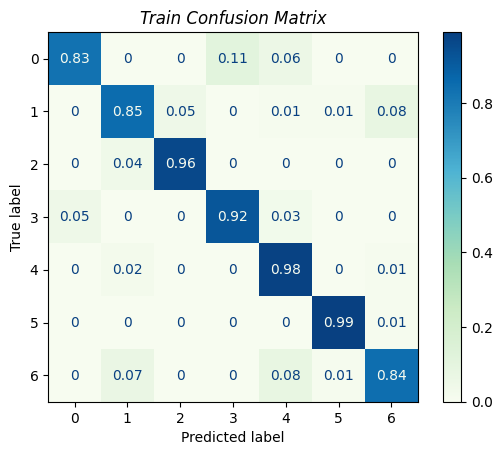

In [12]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
print(classification_report(yTrain, yTrainPred))
cm=confusion_matrix(yTrain, yTrainPred, normalize="true").round (2)
#cmn=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 
#cmn=cmn.round(2)
disp=ConfusionMatrixDisplay(confusion_matrix=cm) 
disp=disp.plot(cmap=plt.cm.GnBu, values_format='g')
plt.title(f"Train Confusion Matrix", style="italic") 
#plt.savefig(f "Model2_CM_8901_(self.header)_Data_Son.jpg")
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.83      1.00      0.91         5
           2       0.94      1.00      0.97        17
           3       0.80      1.00      0.89         4
           4       1.00      0.96      0.98        24
           5       1.00      1.00      1.00        22
           6       0.89      0.80      0.84        10

    accuracy                           0.96        89
   macro avg       0.92      0.95      0.93        89
weighted avg       0.96      0.96      0.95        89



Text(0.5, 1.0, 'Train Confusion Matrix')

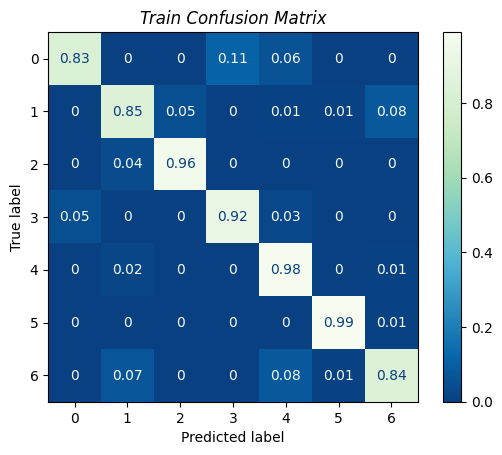

In [13]:
from sklearn.metrics import classification_report

yPred=classifier.predict(XTest)

print(classification_report(yTest, yPred))
cm=confusion_matrix(yTrain, yTrainPred, normalize="true").round (2)
#cmn=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 
#cmn=cmn.round(2)
disp=ConfusionMatrixDisplay(confusion_matrix=cm) 
disp=disp.plot(cmap=plt.cm.GnBu_r, values_format='g')
plt.title(f"Train Confusion Matrix", style="italic") 
#plt.savefig(f "Model2_CM_8901_(self.header)_Data_Son.jpg")
